In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import re
import string
from collections import Counter
from typing import List
import multiprocessing as mp
from functools import partial
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
qasar_t_dir = "/content/drive/My Drive/quasar/quasar-t/"

In [4]:
import ast

filename = qasar_t_dir+ "questions/train_questions.json"
print(filename)

trainQ = []
file = open(filename, "r")
for line in file:
    dictionary = ast.literal_eval(line)
    trainQ.append(dictionary)
file.close()

/content/drive/My Drive/quasar/quasar-t/questions/train_questions.json


In [5]:
trainQ[0:5] 

[{'answer': '24',
  'question': 'How many points does a backgammon board have',
  'tags': ['1tok', 'yes-answer-long', 'yes-answer-short'],
  'uid': 's3q8053'},
 {'answer': 'sherlock holmes',
  'question': 'Whose cases were Empty House Copper Beeches Black Peter',
  'tags': ['yes-answer-long', 'yes-answer-short'],
  'uid': 's3q33199'},
 {'answer': 'sam torrance',
  'question': 'Which Scottish Golfer Was Captain Of Europes 2002 Ryder Cup Team',
  'tags': [],
  'uid': 's3q33198'},
 {'answer': 'first quarter',
  'question': 'What is a two-bit moon',
  'tags': ['yes-answer-long', 'yes-answer-short'],
  'uid': 's3q33194'},
 {'answer': 'nissan',
  'question': "The `` Maxima '' was a model of which car",
  'tags': ['1tok', 'yes-answer-long', 'yes-answer-short'],
  'uid': 's3q33197'}]

In [6]:
filename = qasar_t_dir+ "questions/test_questions.json"
print(filename)

testQ = []
file = open(filename, "r")
for line in file:
    dictionary = ast.literal_eval(line)
    testQ.append(dictionary)
file.close()

/content/drive/My Drive/quasar/quasar-t/questions/test_questions.json


In [7]:
print(len(testQ))

3000


In [8]:
filename = qasar_t_dir+ "questions/dev_questions.json"
print(filename)

devQ = []
file = open(filename, "r")
for line in file:
    dictionary = ast.literal_eval(line)
    devQ.append(dictionary)
file.close()

/content/drive/My Drive/quasar/quasar-t/questions/dev_questions.json


In [9]:
print(len(devQ))

3000


In [10]:
trainQ[62:65]

[{'answer': 'eohippus',
  'question': 'The now_extinct ancestor of the horse , __________ , had a short neck , a pug muzzle , and stood no higher than a medium_sized dog .',
  'tags': ['1tok', 'yes-answer-long', 'yes-answer-short'],
  'uid': 's3q12764'},
 {'answer': '2',
  'question': "How Is The Binary Numer ' 010 ' Expressed As A Decimal",
  'tags': ['1tok', 'yes-answer-long'],
  'uid': 's3q12768'},
 {'answer': 'asteroids',
  'question': 'What are these : Ceres , Juno , Iris , and Flora ?',
  'tags': ['1tok', 'yes-answer-long', 'yes-answer-short'],
  'uid': 's3q42638'}]

In [0]:
#there are fill in the blanks type of Questions - how to handle them??

In [0]:
#check the max length of the question and answer
maxanswerlen = 1
maxlenanswer = ""
maxlenquestion = ""
maxlenanswerindex = 0
for idx, trainQdict in enumerate(trainQ):
  answerlen = len (trainQdict['answer'].split())
  if answerlen > maxanswerlen:
    maxanswerlen = answerlen
    maxlenanswer = trainQdict['answer'].split()
    maxlenquestion = trainQdict['question'].split()
    maxlenanswerindex = idx
  




In [13]:
print (maxanswerlen, '\n', maxlenanswer, '\n', maxlenquestion, '\n', maxlenanswerindex) 

31 
 ['cormac', 'maccarthy,', 'the', 'gaelic', 'lord', 'of', 'blarney', 'was', 'so', 'successful', 'at', 'inventing', 'excuses', 'for', 'not', 'complying', 'with', 'the', 'demands', 'of', 'queen', 'elizabeth', 'i', 'that', 'she', 'was', 'dismissed', 'his', 'blather', 'as', "'blarney'"] 
 ['Ireland', ':', '-', 'What', 'is', 'the', 'origin', 'of', 'the', 'word', '`', 'Blarney', "'", '?'] 
 34337


In [0]:
answerlenlist = []
for trainQdict in trainQ:
  answerlenlist.append(len (trainQdict['answer'].split()))

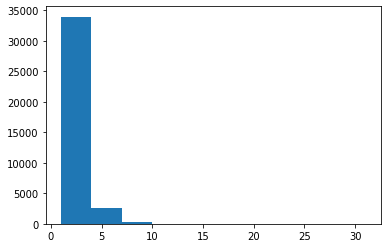

In [15]:
plt.hist((answerlenlist))
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


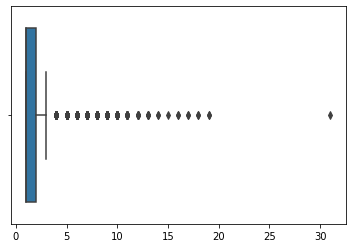

In [16]:
import seaborn as sns
sns.boxplot(answerlenlist)

In [17]:
pd.DataFrame(answerlenlist).describe()

,0
count,37012.000000
mean,1.844672
std,1.255675
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,31.000000


In [18]:
#check the max length of the question and answer
maxquestionlen = 1
maxlenquestion = ""
maxlenquestionans = ""
maxlenanswerindex = 0
for idx, trainQdict in enumerate(trainQ):
  questionlen = len (trainQdict['question'].split())
  if questionlen > maxquestionlen:
    maxquestionlen = questionlen
    maxlenquestion = trainQdict['question'].split()
    maxlenquestionans = trainQdict['answer'].split()
    maxlenanswerindex = idx

print (maxquestionlen, '\n', maxlenquestion, '\n', maxlenquestionans, '\n', maxlenanswerindex) 

92 
 ['As', 'of', 'December', '30', ',', '1997', ',', 'Disney', 'held', 'eight', 'of', 'the', 'top', 'ten', 'spots', 'on', 'the', 'All', 'Time', 'Movie', 'Video', 'Sales', 'Chart', '.The', 'Lion', 'King', '-LRB-', '1', '-RRB-', ',', 'Aladdin', '-LRB-', '2', '-RRB-', ',', 'Cinderella', '-LRB-', '3', '-RRB-', ',', 'Beauty', 'and', 'The', 'Beast', '-LRB-', '4', '-RRB-', ',', 'Snow', 'White', 'and', 'the', 'Seven', 'Dwarfs', '-LRB-', '5', '-RRB-', ',', 'Toy', 'Story', '-LRB-', '7', '-RRB-', ',', '101', 'Dalmatians', '-LRB-', '8', '-RRB-', ',', 'and', 'Pocahontas', '-LRB-', '10', '-RRB-', '.The', 'two', 'non_Disney', 'flicks', 'to', 'make', 'the', 'list', '_', 'Forrest', 'Gump', '-LRB-', '6', '-RRB-', ',', 'and', '__________'] 
 ['jurassic', 'park'] 
 7401


In [0]:
questionlenlist = []
for trainQdict in trainQ:
  questionlenlist.append(len (trainQdict['question'].split()))

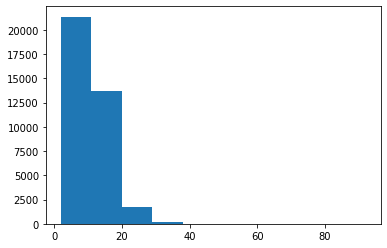

In [20]:
plt.hist((questionlenlist))
plt.show()

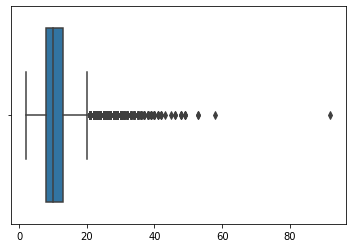

In [21]:
import seaborn as sns
sns.boxplot(questionlenlist)

In [22]:
pd.DataFrame(questionlenlist).describe()

,0
count,37012.000000
mean,10.757430
std,4.678471
min,2.000000
25%,8.000000
50%,10.000000
75%,13.000000
max,92.000000


In [23]:
filename = qasar_t_dir+ "contexts/long/train_contexts.json"
print(filename)

trainLC = []
file = open(filename, "r")
for line in file:
    dictionary = ast.literal_eval(line)
    trainLC.append(dictionary)

file.close()
trainLC[:1]

/content/drive/My Drive/quasar/quasar-t/contexts/long/train_contexts.json


[{'contexts': [[5.811907,
    'Backgammon FAQ : Different Ways of Playing Backgammon FAQ Different Ways of Playing Tables and Backgammon What is tables ? How is backgammon different from the other games of tables ? Does backgammon have official rules ? Backgammon Variants What is Nackgammon ? What is hyper-backgammon ? What is long-gammon ? What is roll-over ? What is backgammon-to-lose ? Acey-Deucey What is acey-deucey ? How do you play American acey-deucey ? How do you play European acey-deucey ? Greek Backgammon What is tavli ? How do you play portes ? How do you play plakoto ? How do you play fevga ? Other Games What is trictrac ? What is Russian backgammon ? What is French backgammon ? What is Dutch backgammon ? What is snake ? Forms of Competition What is money play ? What is match play ? What is a freeze-out match ? What is duplicate backgammon ? Table Stakes What is table stakes betting ? Why is table stakes used ? How does strategy in table stakes differ from unlimited money p

In [24]:
print(len(trainLC))

37012


In [25]:
filename = qasar_t_dir+ "contexts/long/test_contexts.json"
print(filename)

testLC = []
file = open(filename, "r")
for line in file:
    dictionary = ast.literal_eval(line)
    testLC.append(dictionary)

file.close()
testLC[:1]

/content/drive/My Drive/quasar/quasar-t/contexts/long/test_contexts.json


[{'contexts': [[6.4799542,
    "Chess Basics : Learn The Game of Chess | DJ Emir Mixtapes Chess Lessons Next : Tactics The Essence of Chess The Royal Game of Chess `` Every chess master was once a beginner . '' - Chernev Basics - Rules and Piece Movement For Each Chess Piece Objective Checkmate : If your opponent 's King is being attacked ergo would be captured on the next move , that 's called `` check . '' If your opponent has no way to save the King from that situation , that 's `` checkmate , '' and you 've won . Tie Games When the King is not in check but there is no legal move left , the game is tied in a stalemate . The game can also be considered a draw if the pieces enter a repetitive cycle of three identicle board positions . For instance , if you move a piece , your opponent threatens , you move back to the previous position with the same piece , and then this whole pattern repeats twice more , the game may be considered a draw . The game may also be drawn By the 50 Move rul

In [26]:
print(len(testLC))

3000


In [27]:
filename = qasar_t_dir+ "contexts/long/dev_contexts.json"
print(filename)

devLC = []
file = open(filename, "r")
for line in file:
    dictionary = ast.literal_eval(line)
    devLC.append(dictionary)

file.close()
devLC[:1]

/content/drive/My Drive/quasar/quasar-t/contexts/long/dev_contexts.json


[{'contexts': [[5.3229537,
    "Tripedia Information - Drugs and Treatments - MedHelp Home Forums Health Topics Doctors People My MedHelp Login | Sign Up Tripedia Email this Email This Page To A Friend Close Your Name : Your Email : Friend 's Email : Message : Enter the code shown : Generic Name : diphtheria/pertussis , acellular/tetanus Other Brand Names : Acel-Imune , Certiva , Daptacel , Infanrix , diphtheria/pertussis , acellular/tetanus What is diphtheria , tetanus , and pertussis -LRB- DTaP -RRB- vaccines ? Diphtheria , tetanus , and pertussis are serious diseases caused by bacteria . Diphtheria causes a thick coating in the nose , throat , and airway . It can lead to breathing problems , paralysis , heart failure , and even death . Tetanus -LRB- lockjaw -RRB- causes painful tightening of the muscles , usually all over the body . It can lead to `` locking '' of the jaw so the victim can not open his mouth or swallow . Tetanus leads to death in about 1 out of 10 cases . Pertussis 

In [28]:
print(len(devLC))

3000


In [29]:
#the context data ontains all the sentences/paras along with their ranks.
#for longpseudocuments the author used full page text turncated to 2048 char max
#top N text documents, generally N is 20 max
#we will ignore the ranks and append
trainLClist = []
for trainLCdict in trainLC[:1]:
  sublist = trainLCdict["contexts"]
  for i, item in enumerate(sublist):
    print ((item[1]))
  #trainLClist.append(len (trainQdict['question']))

Backgammon FAQ : Different Ways of Playing Backgammon FAQ Different Ways of Playing Tables and Backgammon What is tables ? How is backgammon different from the other games of tables ? Does backgammon have official rules ? Backgammon Variants What is Nackgammon ? What is hyper-backgammon ? What is long-gammon ? What is roll-over ? What is backgammon-to-lose ? Acey-Deucey What is acey-deucey ? How do you play American acey-deucey ? How do you play European acey-deucey ? Greek Backgammon What is tavli ? How do you play portes ? How do you play plakoto ? How do you play fevga ? Other Games What is trictrac ? What is Russian backgammon ? What is French backgammon ? What is Dutch backgammon ? What is snake ? Forms of Competition What is money play ? What is match play ? What is a freeze-out match ? What is duplicate backgammon ? Table Stakes What is table stakes betting ? Why is table stakes used ? How does strategy in table stakes differ from unlimited money play ? Chouette What is a chouet

In [0]:
#lets try some nltk libraries to check some bert based apis
import nltk

In [0]:
from nltk.corpus import gutenberg
from nltk.tokenize.treebank import TreebankWordDetokenizer, TreebankWordTokenizer 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
!pip install deeppavlov
!pip install transformers

     |████████████████████████████████| 757kB 3.4MB/s 
     |████████████████████████████████| 10.4MB 59.0MB/s 
     |████████████████████████████████| 8.0MB 23.3MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 7.3MB 39.9MB/s 
     |████████████████████████████████| 71kB 10.5MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 2.1MB 54.5MB/s 
     |████████████████████████████████| 1.5MB 58.2MB/s 
     |████████████████████████████████| 20.1MB 1.4MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 6.7MB 28.5MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 
     |████████████████████████████████| 61kB 9.6MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 7.1MB 61.7MB/s 
     |████████████████████████████████| 3.9MB 59.8MB/s 
     |█

     |████████████████████████████████| 573kB 3.4MB/s 
     |████████████████████████████████| 890kB 60.9MB/s 
     |████████████████████████████████| 1.0MB 54.1MB/s 
     |████████████████████████████████| 3.7MB 45.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.41-cp36-none-any.whl size=893334 sha256=14183e4a980b7bd1da40a50f888052105627047951cacdf8b6f650dec62b6d4a
  Stored in directory: /root/.cache/pip/wheels/22/5a/d4/b020a81249de7dc63758a34222feaa668dbe8ebfe9170cc9b1
Successfully built sacremoses


In [0]:
from deeppavlov import build_model, configs
import torch

In [0]:
##lets try the first question with the context
'''
TreebankWordTokenizer tokenizer performs the following steps:
  1. split standard contractions, e.g. don't -> do n't and they'll -> they 'll
  2. treat most punctuation characters as separate tokens
  3. split off commas and single quotes, when followed by whitespace
  4. separate periods that appear at the end of line
'''

paras = []
words = []
for trainLCdict in trainLC[:1]:
  sublist = trainLCdict["contexts"]
  for i, item in enumerate(sublist):
    sent = item[1]#TreebankWordDetokenizer().detokenize(item[1])
    paras.append(sent)
    words.append(TreebankWordTokenizer().tokenize(sent))

words = sum(words, [])

In [35]:
print (paras, '\n', len(paras))
print (words, '\n', len(words), '\n', len(list(set(words))) )

['Backgammon FAQ : Different Ways of Playing Backgammon FAQ Different Ways of Playing Tables and Backgammon What is tables ? How is backgammon different from the other games of tables ? Does backgammon have official rules ? Backgammon Variants What is Nackgammon ? What is hyper-backgammon ? What is long-gammon ? What is roll-over ? What is backgammon-to-lose ? Acey-Deucey What is acey-deucey ? How do you play American acey-deucey ? How do you play European acey-deucey ? Greek Backgammon What is tavli ? How do you play portes ? How do you play plakoto ? How do you play fevga ? Other Games What is trictrac ? What is Russian backgammon ? What is French backgammon ? What is Dutch backgammon ? What is snake ? Forms of Competition What is money play ? What is match play ? What is a freeze-out match ? What is duplicate backgammon ? Table Stakes What is table stakes betting ? Why is table stakes used ? How does strategy in table stakes differ from unlimited money play ? Chouette What is a chou

In [36]:
##now using a simple count vectorize  - context
count_vec = CountVectorizer(stop_words='english', ngram_range=(1,2))
count_vec_total_text = count_vec.fit_transform(paras)
print(count_vec.get_feature_names())
np.shape(count_vec_total_text)

['10', '10 lrb', '100', '100 rrb', '1000', '1000 sets', '12', '12 long', '12 rrb', '13', '13 checkers', '13 point', '13 site', '15', '15 black', '15 checkers', '15 color', '15 colors', '15 different', '15 men', '15 pieces', '15 sided', '15 white', '16', '16 32', '1976', '1976 rrb', '1979', '1979 hans', '19th', '19th century', '1on1backgammon', '1on1backgammon main', '1trying', '1trying trap', '20', '20 lrb', '2006', '2006 introduction', '21', '21 poker', '24', '24 12', '24 boring', '24 checkers', '24 dagger', '24 opponent', '24 point', '24 points', '24 right', '24 rrb', '24 spaces', '24 triangles', '24 triangular', '2escaping', '2escaping runners', '30', '30 checkers', '30 know', '3000', '3000 gameplay', '32', '32 64', '400', '400 years', '47681', '47681 rrb', '50', '50 rrb', '5000', '5000 years', '64', '64 doubling', '64 faces', '64 used', '65', '65 93', '91', '91 20', '93', '93 20', '94', '94 10', 'able', 'able learn', 'able make', 'able soackgammon', 'able start', 'accommodate', 'ac

(20, 3395)

In [37]:
##lets do the same for the question
ques_dict = trainQ[:1][0]
ques = ques_dict['question']
print (ques)

How many points does a backgammon board have


In [38]:
queslist = TreebankWordTokenizer().tokenize(ques)
queslist

['How', 'many', 'points', 'does', 'a', 'backgammon', 'board', 'have']

In [39]:
count_vec_ques_text = count_vec.transform(queslist)
print(count_vec.get_feature_names())
np.shape(count_vec_ques_text)

['10', '10 lrb', '100', '100 rrb', '1000', '1000 sets', '12', '12 long', '12 rrb', '13', '13 checkers', '13 point', '13 site', '15', '15 black', '15 checkers', '15 color', '15 colors', '15 different', '15 men', '15 pieces', '15 sided', '15 white', '16', '16 32', '1976', '1976 rrb', '1979', '1979 hans', '19th', '19th century', '1on1backgammon', '1on1backgammon main', '1trying', '1trying trap', '20', '20 lrb', '2006', '2006 introduction', '21', '21 poker', '24', '24 12', '24 boring', '24 checkers', '24 dagger', '24 opponent', '24 point', '24 points', '24 right', '24 rrb', '24 spaces', '24 triangles', '24 triangular', '2escaping', '2escaping runners', '30', '30 checkers', '30 know', '3000', '3000 gameplay', '32', '32 64', '400', '400 years', '47681', '47681 rrb', '50', '50 rrb', '5000', '5000 years', '64', '64 doubling', '64 faces', '64 used', '65', '65 93', '91', '91 20', '93', '93 20', '94', '94 10', 'able', 'able learn', 'able make', 'able soackgammon', 'able start', 'accommodate', 'ac

(8, 3395)

In [0]:
#compute cosine similarity
dist = cosine_similarity(count_vec_ques_text, count_vec_total_text)

In [41]:
dist_array = dist[0]
dist_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [42]:
!python -m deeppavlov install squad_bert

2020-04-16 16:40:34.318 INFO in 'deeppavlov.core.common.file'['file'] at line 30: Interpreting 'squad_bert' as '/usr/local/lib/python3.6/dist-packages/deeppavlov/configs/squad/squad_bert.json'
     |████████████████████████████████| 110.5MB 38kB/s 
     |████████████████████████████████| 512kB 54.2MB/s 
     |████████████████████████████████| 3.8MB 49.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=cade086d2df9ec35ebb991f909d68849939dfb702a76a6f9960fdc657f598f03
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2

In [43]:
model = build_model(configs.squad.squad_bert, download = True)

2020-04-16 16:41:39.660 INFO in 'deeppavlov.core.data.utils'['utils'] at line 80: Downloading from http://files.deeppavlov.ai/deeppavlov_data/bert/cased_L-12_H-768_A-12.zip to /root/.deeppavlov/downloads/cased_L-12_H-768_A-12.zip
100%|██████████| 404M/404M [01:23<00:00, 4.86MB/s]
2020-04-16 16:43:02.789 INFO in 'deeppavlov.core.data.utils'['utils'] at line 237: Extracting /root/.deeppavlov/downloads/cased_L-12_H-768_A-12.zip archive into /root/.deeppavlov/downloads/bert_models
2020-04-16 16:43:07.858 INFO in 'deeppavlov.core.data.utils'['utils'] at line 80: Downloading from http://files.deeppavlov.ai/deeppavlov_data/squad_bert.tar.gz to /root/.deeppavlov/squad_bert.tar.gz
100%|██████████| 402M/402M [01:12<00:00, 5.58MB/s]
2020-04-16 16:44:19.962 INFO in 'deeppavlov.core.data.utils'['utils'] at line 237: Extracting /root/.deeppavlov/squad_bert.tar.gz archive into /root/.deeppavlov/models
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt











The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.





Instructions for updating:
Use standard file APIs to check for files with this prefix.


2020-04-16 16:44:42.293 INFO in 'deeppavlov.core.models.tf_model'['tf_model'] at line 51: [loading model from /root/.deeppavlov/models/squad_bert/model]



INFO:tensorflow:Restoring parameters from /root/.deeppavlov/models/squad_bert/model


In [44]:
predicted_ans_list = []
for para in paras:
  predicted_ans = model([para], [ques])
  predicted_ans_list.append(predicted_ans)
  print(predicted_ans)
  

[[''], [-1], [0.16582123935222626]]
[['twenty four'], [316], [1.8405643701553345]]
[[''], [-1], [2.751746416091919]]
[[''], [-1], [0.2406836599111557]]
[['24'], [1147], [2197.120361328125]]
[[''], [-1], [1.966139793395996]]
[['twelve'], [900], [7.840240001678467]]
[['twenty-four'], [759], [0.3630030155181885]]
[[''], [-1], [0.7989748120307922]]
[[''], [-1], [0.09640388190746307]]
[['fifteen'], [372], [1.6808995008468628]]
[['fifteen'], [519], [1.4429689645767212]]
[['30'], [716], [0.16231516003608704]]
[[''], [-1], [0.13656415045261383]]
[['1'], [1429], [279.1555480957031]]
[[''], [-1], [0.26882654428482056]]
[['LRB- points -RRB'], [408], [1170.515869140625]]
[['two players . Each player has fifteen pieces'], [65], [1.5717989206314087]]
[['24'], [173], [2359.209228515625]]
[['fifteen pieces'], [631], [0.1550811231136322]]


In [0]:
maxscore = 0.0000001
maxscoreindex = 0
for index, item in enumerate(predicted_ans_list):
  score = item[2][0]
  if (score > maxscore):
    maxscore = score
    maxscoreindex = index

In [46]:
predicted_ans = predicted_ans_list[maxscoreindex][0][0]
print (predicted_ans_list[maxscoreindex][0],
       predicted_ans_list[maxscoreindex][1],
       predicted_ans_list[maxscoreindex][2])
print(predicted_ans)

['24'] [173] [2359.209228515625]
24


In [47]:
answer_dict = trainQ[:1][0]
ans = ques_dict['answer']
print (ans)

24


In [0]:

def remove_articles(text):
    return re.sub(r'\b(a|an|the)\b', ' ', text)

def white_space_fix(text):
    return ' '.join(text.split())

def remove_punc(text):
    exclude = set(string.punctuation)
    return ''.join(ch for ch in text if ch not in exclude)

def lower(text):
    return text.lower()

def normalize_answer(s: str) -> str:
    return white_space_fix(remove_articles(remove_punc(lower(s))))

In [0]:
def exact_match_metric(iy_predicted_list: List[str], iground_truth: str):
  y_predicted = [normalize_answer(y_pred) for y_pred in iy_predicted_list]
  ground_truth =  normalize_answer( iground_truth )
  res = [ele for ele in y_predicted if(ele in ground_truth)]
  return (sum([(bool(res))]))

In [0]:
def f1_score_metric(iy_predicted_list: List[str], iground_truth: str):
  f1_total = 0.0
  precisions = []
  recalls = []
  f1s = []
  y_predicted = [normalize_answer(y_pred) for y_pred in iy_predicted_list]
  ground_truth =  normalize_answer( iground_truth )
  
  for prediction in y_predicted:
      prediction_tokens = prediction.split()
      gt_tokens = ground_truth.split()
      #print(prediction_tokens)
      #print(gt_tokens)
      if len(gt_tokens) == 0 or len(prediction_tokens) == 0:
          precisions.append(float(gt_tokens == prediction_tokens))
          recalls.append(float(gt_tokens == prediction_tokens))
          f1s.append(float(gt_tokens == prediction_tokens))
          continue
      common = Counter(prediction_tokens) & Counter(gt_tokens)
      num_same = sum(common.values())
      #print(common, num_same)
      if num_same == 0:
          precisions.append(0.0)
          recalls.append(0.0)
          f1s.append(0.0)
          continue
      precision = 1.0 * num_same / len(prediction_tokens)
      recall = 1.0 * num_same / len(gt_tokens)
      f1 = (2 * precision * recall) / (precision + recall)
      f1s.append(f1)
      precisions.append(precision)
      recalls.append(recall)

  f1_total = max(f1s)    
  return (max(precisions), max(recalls), max(f1s))

In [0]:
def get_predicted_answer(iQues, iContext, ingram, imodel, 
                         itopN_pred_ans, iRemove_word_list, id):
  
  """
  Tokenize the context containing multiple paragraphs
  Each para  - broken to sentence
  """
  paras = []
  words = []
  predicted_ans = ""
  y_predicted_lst = []
  
  for ConextDict in iContext[id:id+1]:
    sublist = ConextDict["contexts"]
    for i, item in enumerate(sublist):
      sent = (item[1]) #TreebankWordDetokenizer().detokenize(item[1])
      paras.append(sent)
    
  ##lets do the same for the question
  ques_dict = iQues[id:id+1][0]
  ques = (ques_dict['question'])

  #get model prediction
  predicted_ans_list = []
  for para in paras:
    predicted_ans = imodel([para], [ques])
    predicted_ans_list.append(sum(predicted_ans, []))
    #print(predicted_ans)  
  
  predicted_ans_list = sorted(predicted_ans_list, key = lambda x: x[2], 
                                reverse=True)
  for i in range(itopN_pred_ans):
    word_list = lower(predicted_ans_list[i][0]).split()
    predicted_ans_list[i][0] = (' '.join(
        [i for i in word_list if i not in iRemove_word_list]))
    y_predicted_lst.append(predicted_ans_list[i][0])
  
  
  actual_ans = ques_dict['answer']
  print (y_predicted_lst, ',' ,normalize_answer( actual_ans ))

  EM = exact_match_metric(y_predicted_lst, actual_ans)
  precision, recall, f1 = f1_score_metric(y_predicted_lst, actual_ans)

  return  y_predicted_lst, [normalize_answer(actual_ans), normalize_answer(ques), EM, precision, recall, f1]


In [73]:
import time
id = 7401
ingram = 2
itopN_pred_ans = 3

Remove_word_list = ['lrb-' , '-rrb', '-lrb-', '-lsb-', '-rrb-', '-rsb-']

pred_ans_list_col_names = {}

for i in range(itopN_pred_ans):
  pred_ans_list_col_names[('pred_ans_' + str(i))] = []

df_pred= pd.DataFrame(pred_ans_list_col_names)
df_metrics = pd.DataFrame({'actual_ans': [], 'actual_ques': [], 'EM': [], 'precision': [], 'recall': [], 'f1': []})

t1 = time.time()

#change devQ to testQ and devLC to testLC in order to run the test and dev
#running only 200 records due to run taking long time- less RAM and also can't parallelize
for id, testQdict in enumerate(devQ[0:200]):
  pred, metrics = get_predicted_answer(devQ, devLC,  2, model, 3, Remove_word_list, id)
  
  for i in  range(itopN_pred_ans):
    pred_ans_list_col_names[('pred_ans_' + str(i))] = pred[i]

  df_pred = df_pred.append(pred_ans_list_col_names, ignore_index=True)

  df_metrics = df_metrics.append({'actual_ans': metrics[0], 'actual_ques': metrics[1], 'EM': metrics[2], 
                              'precision': metrics[3], 'recall': metrics[4], 'f1': metrics[5]}, ignore_index=True)

t2 = time.time()
print('Time for whole code to run: ', (t2-t1))

['tetanus tetanus', 'tetanus', 'tetanus'] , tetanus
['vidalia sweet onion', 'vidalia sweet onion', 'allium porrum'] , leek
['star wars', 'the guns of navarone', 'star wars'] , guns of naverone
['dock of the bay hit no. 1', "sittin ' on the dock of the bay", "sittin ' on the dock of the bay"] , sitting on dock of bay
['king henry viii', 'herod', 'herod antipas'] , king herod
["shirley jones 's eldest son , keith partridge", 'rudolph the red-nosed reindeer', "shirley jones 's eldest son , keith partridge"] , keith partridge
['glitter from fireworks', 'the ancient chinese used sulphur as a medicine', 'bamboo stems were burnt to create small explosions in order to drive away evil spirits'] , fire alarms
['grand rapids , minnesota', 'lancaster , california', 'chicago , illinois'] , new grand theater
['ball to honor their gods', 'ulama', 'basketball'] , basketball
['seine martime', 'franciscopolis', 'seine-maritime'] , le havre
['300', 'fifty', '40'] , 100000
['ethanol fuel renewable energy'

In [74]:
df_pred

,pred_ans_0,pred_ans_1,pred_ans_2
0,tetanus tetanus,tetanus,tetanus
1,vidalia sweet onion,vidalia sweet onion,allium porrum
2,star wars,the guns of navarone,star wars
3,dock of the bay hit no. 1,sittin ' on the dock of the bay,sittin ' on the dock of the bay
4,king henry viii,herod,herod antipas
...,...,...,...
195,calories colliery celery calcium,a racing snake,fiddle
196,"regularly spaced , protruding air-filled hemis...","regularly spaced , protruding air-filled hemis...","regularly spaced , protruding air-filled hemis..."
197,franklin joseph lymon,franklin joseph lymon,frankie lymon and the teenagers
198,"june 24 , 1987",blood-loss induced trance,a nosebleed or an alcoholism-induced esophagea...


In [75]:
df_metrics

,actual_ans,actual_ques,EM,precision,recall,f1
0,tetanus,lockjaw is another name for which disease,1.0,1.000000,1.000000,1.000000
1,leek,which vegetable is welsh emblem,0.0,0.000000,0.000000,0.000000
2,guns of naverone,which film won best special effects oscar in 1961,0.0,0.666667,0.666667,0.666667
3,sitting on dock of bay,what was otis redding s biggest hit coming aft...,0.0,0.800000,0.800000,0.800000
4,king herod,who ordered john baptists execution,1.0,1.000000,0.500000,0.666667
...,...,...,...,...,...,...
195,fiddle,as fit as,1.0,1.000000,1.000000,1.000000
196,bubble wrap,plastic wrapping material in sheets containing...,0.0,0.000000,0.000000,0.000000
197,frankie lymon,name youthful singer who headed teenagers,0.0,0.500000,1.000000,0.666667
198,booze u2013 honeymoon 30 day booze up,how did attila hun die on honeymoon,0.0,0.000000,0.000000,0.000000


In [76]:
df_metrics['f1'].mean(), df_metrics['EM'].mean(), df_metrics['precision'].mean() , df_metrics['recall'].mean() 

(0.41720249195249204, 0.44, 0.4152164502164502, 0.4732619047619048)

In [0]:
filename = qasar_t_dir+ "contexts/short/train_contexts.json"
print(filename)

trainSC = []
file = open(filename, "r")
for line in file:
    dictionary = ast.literal_eval(line)
    trainSC.append(dictionary)

file.close()
trainSC[:1]

/content/drive/My Drive/quasar/quasar-t/contexts/short/train_contexts.json


[{'contexts': [[12.680223, 'Does backgammon have official rules ?'],
   [12.533287,
    "There 's no limit to how many checkers each backgammon player may have on a point ."],
   [11.789606, "How does `` legal plays only '' work ?"],
   [11.722904, 'Q : Does backgammon have official rules ?'],
   [10.598074,
    'The number on the dice tells the player how many points or ipshe can move his marker .'],
   [10.598074,
    'The dice indicate how many points or pips a player can move its checkers .'],
   [10.598074,
    'Movement of the Checkers The roll of the dice indicates how many points , or pips , the player is to move his checkers .'],
   [10.598074,
    'Movement : The roll of the dice indicates how many points , or pips , the player is to move his checkers .'],
   [10.511074,
    "If that player does n't have any checkers on the 5 and 6 points , then he can remove checkers on lower points ."],
   [10.477706,
    'How does strategy in table stakes differ from unlimited money play ?